In [1]:
# Import Library / Read csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from statistics import mean
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('baseSemNulls.csv')

In [2]:
print("INFO Dataset: ", df.shape)

INFO Dataset:  (58090, 16)


In [3]:
### Seperar Target e Source
x = df.values[:,0:15]
y = df.values[:,15]

In [4]:
### Split the TEST_data and TRAIN_data      ( 30 % TESTE - 70 % TREINO )
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state= 100)

In [5]:
####### Função para testar qual valor optimo dos atributos max da arvore de decisão

# tipos = Leaf / Features / depth 

def Testador_atributo (tipo,valor,x_train,y_train,x_test,y_test):
    axis = []
    previsão = []
    best = [0,0]
    i = 2
    while i <= valor:
        if tipo != 'features':
            if tipo == 'leafs':
                clf = DecisionTreeClassifier(max_leaf_nodes=i)
            
            else: # Depth 
                clf = DecisionTreeClassifier(max_depth=i)
                
            clf.fit(x_train,y_train)
            predict = clf.predict(x_test)
            score = (accuracy_score(y_test,predict)*100)
            
        else: # features
            j = 1
            features_l = 0
            while j < 10:
                clf = DecisionTreeClassifier(max_features=i)
                clf.fit(x_train,y_train)
                predict = clf.predict(x_test)
                features_l = features_l + (accuracy_score(y_test,predict)*100)
                j = j + 1
                
            score = features_l/(j-1)
            
        axis.append(i)
        previsão.append(score)
        if score > best[1]:
            best[0] = i
            best[1] = score
            
        i = i + 1
        
    return [axis,previsão,best]

####

In [6]:
# Função para plotar graficos

def plotador (x,y,tipo,maxn,maxp):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel("N_"+ tipo)
    ax.set_ylabel("Acerto %")
    ax.set_title("MAX_"+ tipo + " NA ARVORE")
    fig.set_size_inches(10, 5)
    plt.show()
    return ("O melhor Numero de MAX_" + tipo + " é " + str(maxn) + " Com Precisão de " +  str(maxp))

###    

In [7]:
# Qual maior precisão de Max_leafs_Nodes / Max_Depth / Max_Features
max_depths = Testador_atributo('Depths',20,x_train,y_train,x_test,y_test)
max_features = Testador_atributo('features',15,x_train,y_train,x_test,y_test)
max_leafs = Testador_atributo('leafs',500,x_train,y_train,x_test,y_test)

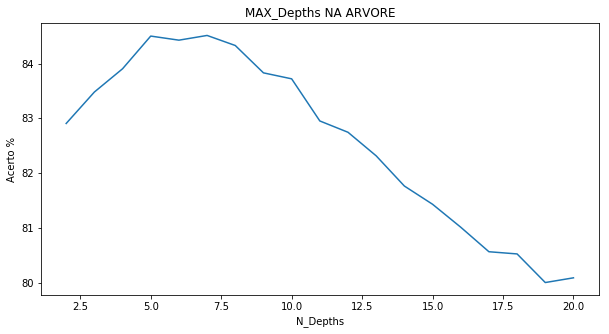

'O melhor Numero de MAX_Depths é 7 Com Precisão de 84.51253801572273'

In [8]:
## PLOTAR MAX DEPTHS
plotador (max_depths[0],max_depths[1],'Depths',max_depths[2][0],max_depths[2][1])

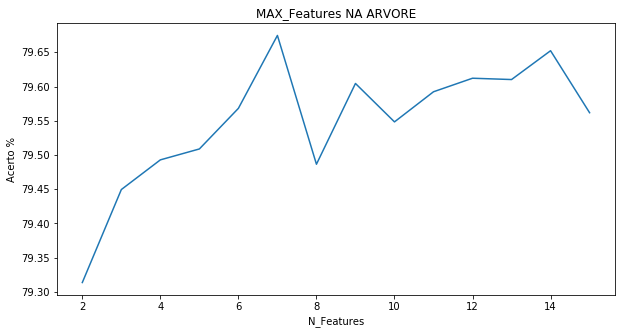

'O melhor Numero de MAX_Features é 7 Com Precisão de 79.67457903763636'

In [9]:
## PLOTAR MAX Features
plotador (max_features[0],max_features[1],'Features',max_features[2][0],max_features[2][1])

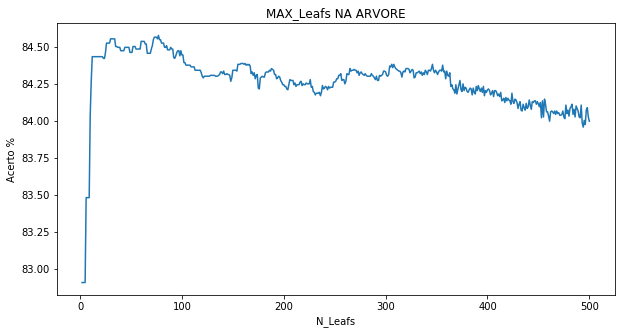

'O melhor Numero de MAX_Leafs é 77 Com Precisão de 84.57565846100879'

In [10]:
## PLOTAR MAX LEAFS
plotador (max_leafs[0],max_leafs[1],'Leafs',max_leafs[2][0],max_leafs[2][1])

In [11]:
####### Função para Testar qual a melhor arvore
### Range leafs (50 - 100)
### Range Depth (1 - 9) Max depth in a 100 leafs tree 
### Range feature(5 - 7) Evitar Overfitting

def Best_arvore (x_train,y_train,x_test,y_test):
    # best = [features,depth,leafs,precision]
    best = [0,0,0,0]
    max_f = 7
    max_d = 9
    max_l = 100
    i = 5
    while i <= max_f:
        j = 1
        while j <= max_d:
            k = 50
            while k <= max_l:
                total = 0
                for r in range (10):
                    clf = DecisionTreeClassifier(max_features=i,max_depth=j,max_leaf_nodes=k)
                    clf.fit(x_train,y_train)
                    predict = clf.predict(x_test)
                    score = (accuracy_score(y_test,predict)*100)
                    total = total + score
                
                total = total/10
                
                if total > best[3]:
                    best[0] = i
                    best[1] = j
                    best[2] = k
                    best[3] = total
                
                k = k + 1
            
            j = j + 1
        
        i = i + 1
                
    return best

####

In [12]:
best_arvore = Best_arvore(x_train,y_train,x_test,y_test)

In [13]:
# Printar o melhor resultado encontrado
# Recorde "A melhor Arvore tem 10 Features e 7 de Depth com 70 Folhas e uma precisão de 85.0289780226086"

print("A melhor Arvore tem",best_arvore[0],"Features e",best_arvore[1],"de Depth com",best_arvore[2],"Folhas e uma precisão de",best_arvore[3])

A melhor Arvore tem 7 Features e 8 de Depth com 81 Folhas e uma precisão de 84.56992023871005
